# Let's get some statistics from the dataset

In [22]:
import os
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
dataset_path = '../data/mars_for_students.npz'

data = np.load(dataset_path)
training_set = data["training_set"]

X_train = training_set[:, 0]
y_train = training_set[:, 1]

X_test = data["test_set"]

In [24]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (2615, 64, 128)
Shape of y_train: (2615, 64, 128)
Shape of X_test: (10022, 64, 128)


## Data exploration

C:\Users\camil\AppData\Local\Temp\ipykernel_22780\3696961474.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', 5)


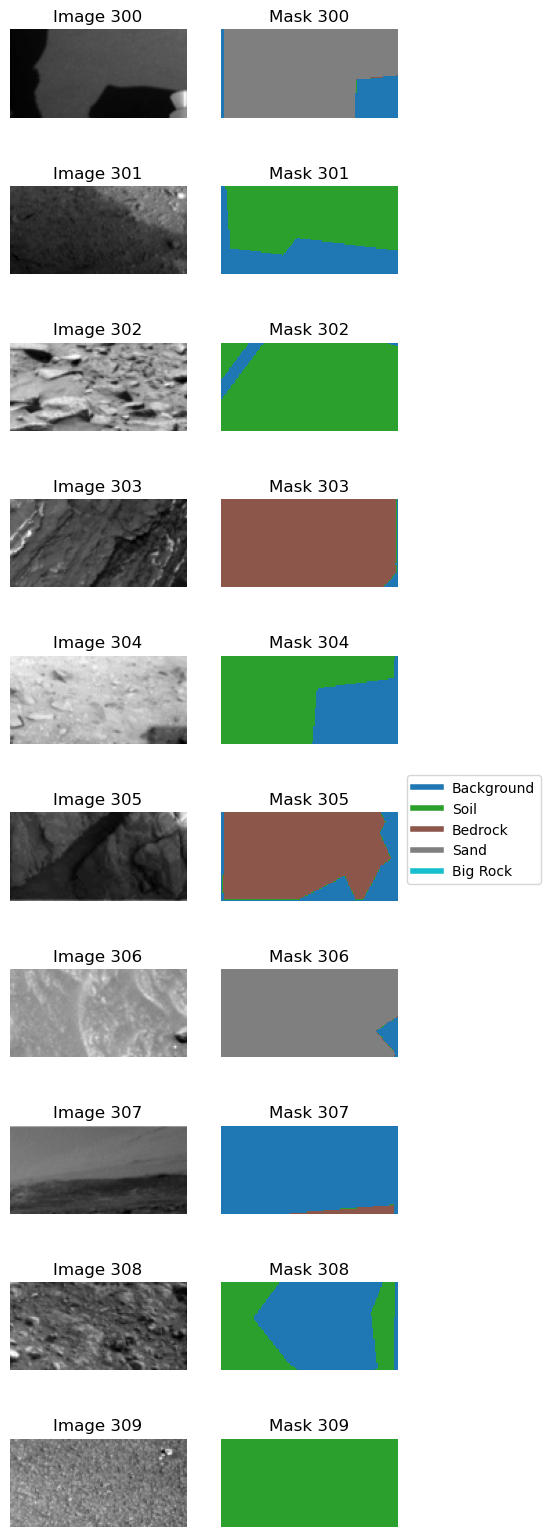

In [62]:
# Select 10 random indices
random_indices = np.random.choice(len(X_train), 10, replace=False)
random_indices = [i for i in range(300,310)]

# Define a color map for the labels
cmap = plt.cm.get_cmap('tab10', 5)

# Plot the images and their corresponding masks
fig, axes = plt.subplots(10, 2, figsize=(5, 20))
for i, idx in enumerate(random_indices):
    axes[i, 0].imshow(X_train[idx], cmap='gray')
    axes[i, 0].axis('off')
    axes[i, 0].set_title(f'Image {idx}')
    
    mask = y_train[idx]
    axes[i, 1].imshow(mask, cmap=cmap, vmin=0, vmax=4)
    axes[i, 1].axis('off')
    axes[i, 1].set_title(f'Mask {idx}')

# Create a legend for the labels
labels = ['Background', 'Soil', 'Bedrock', 'Sand', 'Big Rock']
handles = [plt.Line2D([0], [0], color=cmap(i), lw=4) for i in range(5)]
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.2, 0.5))
plt.show()

Oh, so there is life in mars

Class Distribution:
Class 0: 4988826 pixels
Class 1: 6957538 pixels
Class 2: 4776810 pixels
Class 3: 3770823 pixels
Class 4: 26963 pixels


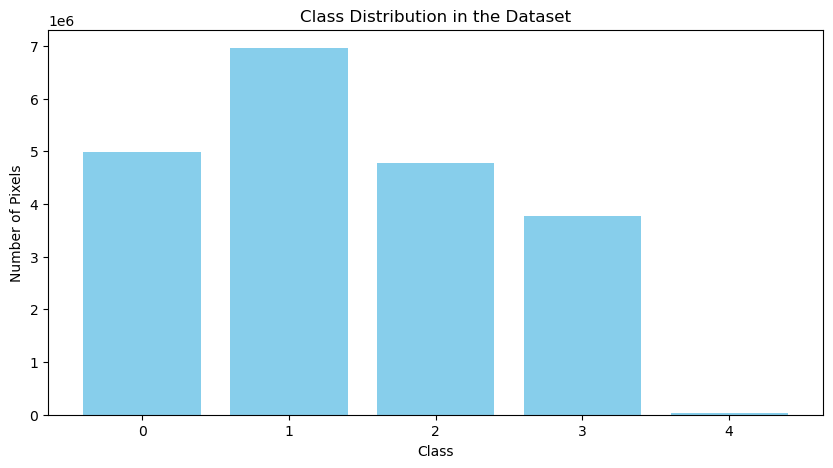

In [51]:
# Flatten the masks to count the occurrences of each class
flattened_masks = y_train.flatten()

# Count the occurrences of each class
unique, counts = np.unique(flattened_masks, return_counts=True)

# Create a dictionary to store the class distribution
class_distribution = dict(zip(unique, counts))

# Print the class distribution
print("Class Distribution:")
for cls, count in class_distribution.items():
    print(f"Class {int(cls)}: {count} pixels")

# Plot the class distribution
plt.figure(figsize=(10, 5))
plt.bar(class_distribution.keys(), class_distribution.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Pixels')
plt.title('Class Distribution in the Dataset')
plt.xticks(list(class_distribution.keys()))
plt.show()

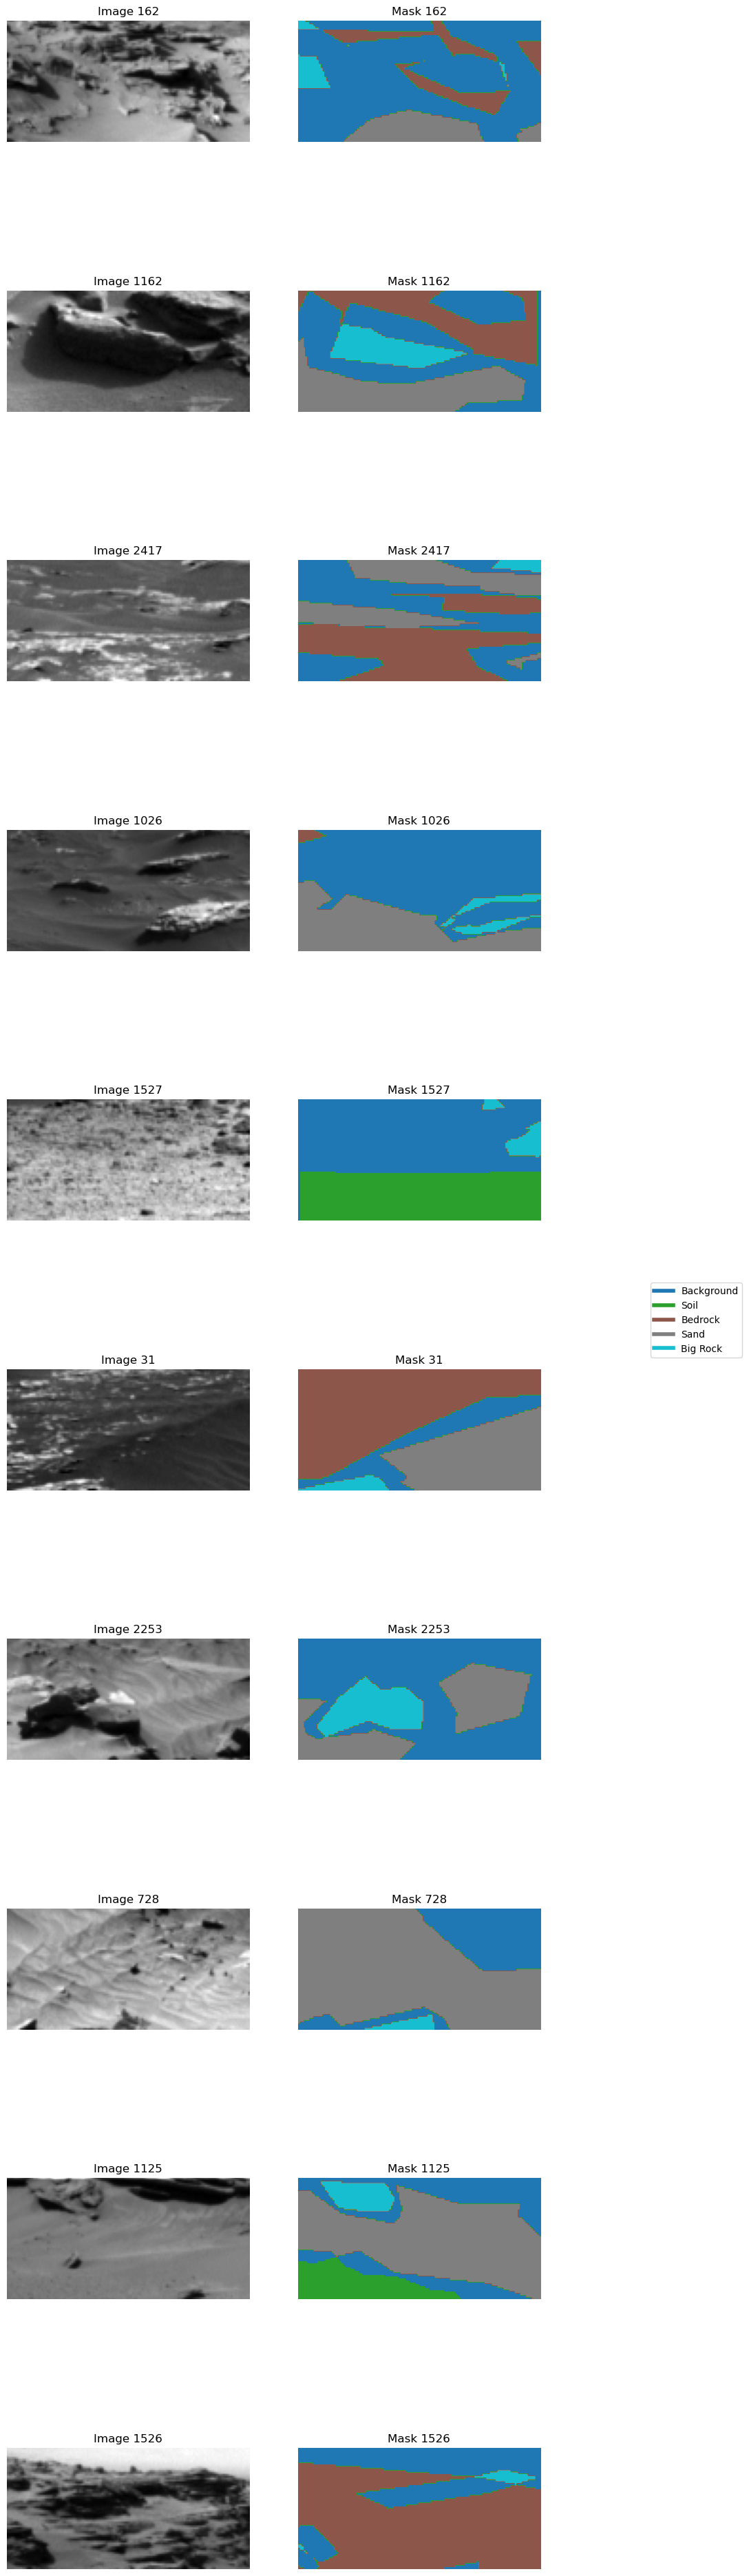

In [64]:
# Find indices of images with class 4 in their masks
indices_with_class_4 = [i for i, mask in enumerate(y_train) if 4 in mask]

# Select 10 random indices from the indices_with_class_4
random_indices_with_class_4 = np.random.choice(indices_with_class_4, 10, replace=False)

# Plot the images and their corresponding masks
fig, axes = plt.subplots(10, 2, figsize=(10, 50))
for i, idx in enumerate(random_indices_with_class_4):
    axes[i, 0].imshow(X_train[idx], cmap='gray')
    axes[i, 0].axis('off')
    axes[i, 0].set_title(f'Image {idx}')
    
    axes[i, 1].imshow(y_train[idx], cmap=cmap, vmin=0, vmax=4)
    axes[i, 1].axis('off')
    axes[i, 1].set_title(f'Mask {idx}')
# Create a legend for the labels
labels = ['Background', 'Soil', 'Bedrock', 'Sand', 'Big Rock']
handles = [plt.Line2D([0], [0], color=cmap(i), lw=4) for i in range(5)]
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.2, 0.5))
plt.show()

## Checking outliers

### PCA

C:\Users\camil\AppData\Local\Temp\ipykernel_22780\2132816272.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='tab10', alpha=0.5)


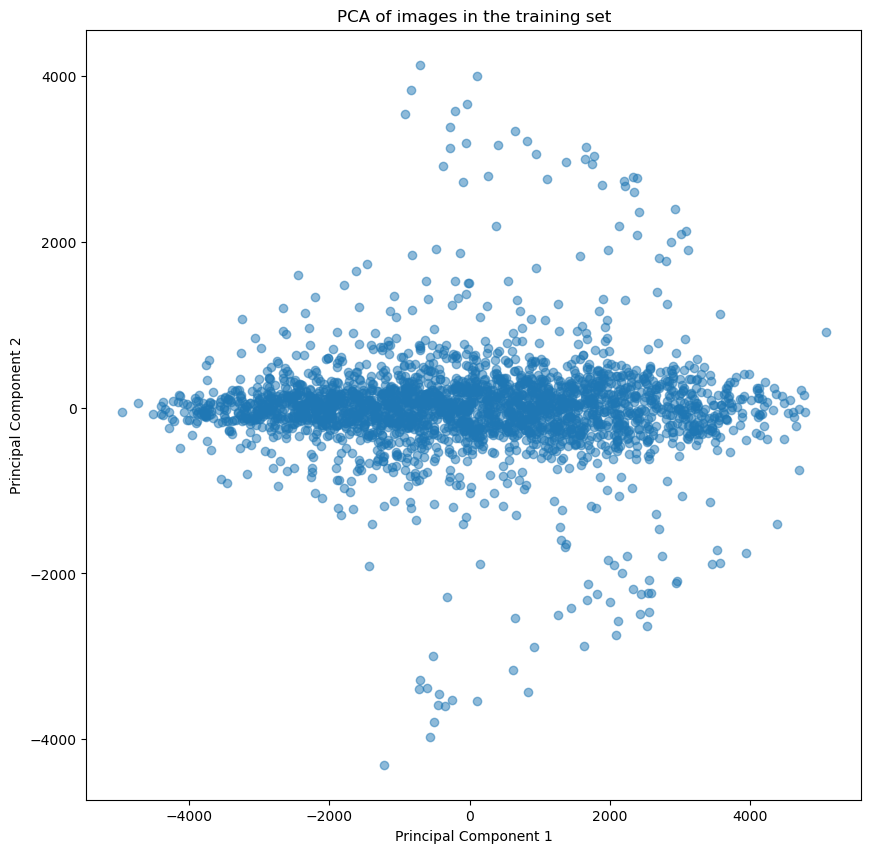

In [26]:
from sklearn.decomposition import PCA

# Flatten the images
X_train_flattened = X_train.reshape(X_train.shape[0], -1)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_flattened)

# Plot the PCA results
plt.figure(figsize=(10, 10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='tab10', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of images in the training set')
plt.show()

C:\Users\camil\AppData\Local\Temp\ipykernel_22780\1700053580.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_pca[:, 0], y_pca[:, 1], cmap='tab10', alpha=0.5)


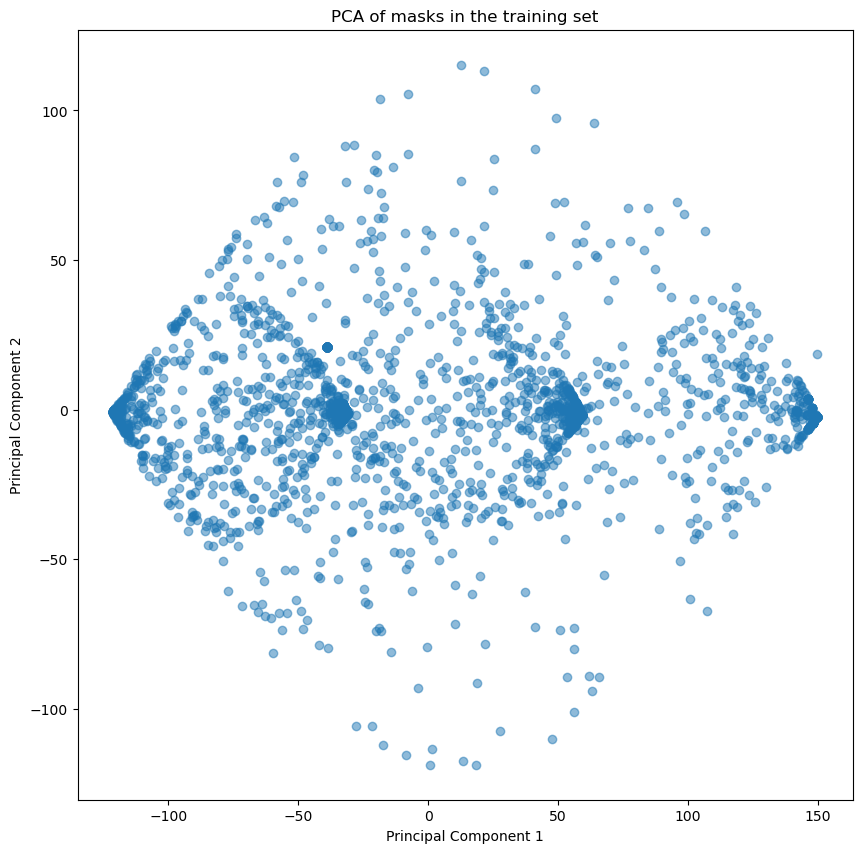

In [27]:
from sklearn.decomposition import PCA

# Flatten the images
y_train_flattened = y_train.reshape(y_train.shape[0], -1)

# Apply PCA
pca = PCA(n_components=2)
y_pca = pca.fit_transform(y_train_flattened)

# Plot the PCA results
plt.figure(figsize=(10, 10))
plt.scatter(y_pca[:, 0], y_pca[:, 1], cmap='tab10', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of masks in the training set')
plt.show()

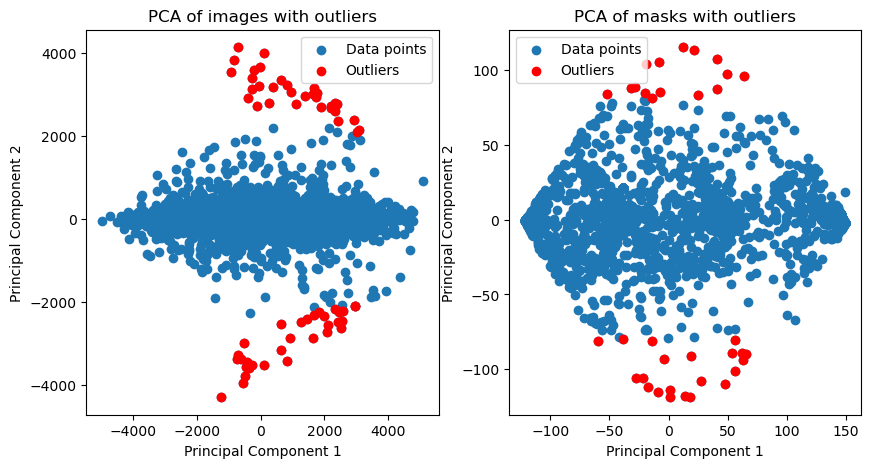

In [28]:
from scipy.spatial.distance import mahalanobis

# Calculate Mahalanobis distances for images
mean_X_pca = np.mean(X_pca, axis=0)
cov_X_pca = np.cov(X_pca, rowvar=False)
inv_cov_X_pca = np.linalg.inv(cov_X_pca)
mahalanobis_distances_X = [mahalanobis(x, mean_X_pca, inv_cov_X_pca) for x in X_pca]

# Calculate Mahalanobis distances for masks
mean_y_pca = np.mean(y_pca, axis=0)
cov_y_pca = np.cov(y_pca, rowvar=False)
inv_cov_y_pca = np.linalg.inv(cov_y_pca)
mahalanobis_distances_y = [mahalanobis(y, mean_y_pca, inv_cov_y_pca) for y in y_pca]

# Define a threshold for outliers (e.g., 3 standard deviations from the mean)
threshold_X = np.mean(mahalanobis_distances_X) + 3 * np.std(mahalanobis_distances_X)
threshold_y = np.mean(mahalanobis_distances_y) + 3 * np.std(mahalanobis_distances_y)

# Identify outliers
outliers_X = np.where(mahalanobis_distances_X > threshold_X)[0]
outliers_y = np.where(mahalanobis_distances_y > threshold_y)[0]

# Plot the PCA results with outliers highlighted
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], label='Data points')
plt.scatter(X_pca[outliers_X, 0], X_pca[outliers_X, 1], color='r', label='Outliers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of images with outliers')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_pca[:, 0], y_pca[:, 1], label='Data points')
plt.scatter(y_pca[outliers_y, 0], y_pca[outliers_y, 1], color='r', label='Outliers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of masks with outliers')
plt.legend()

plt.show()

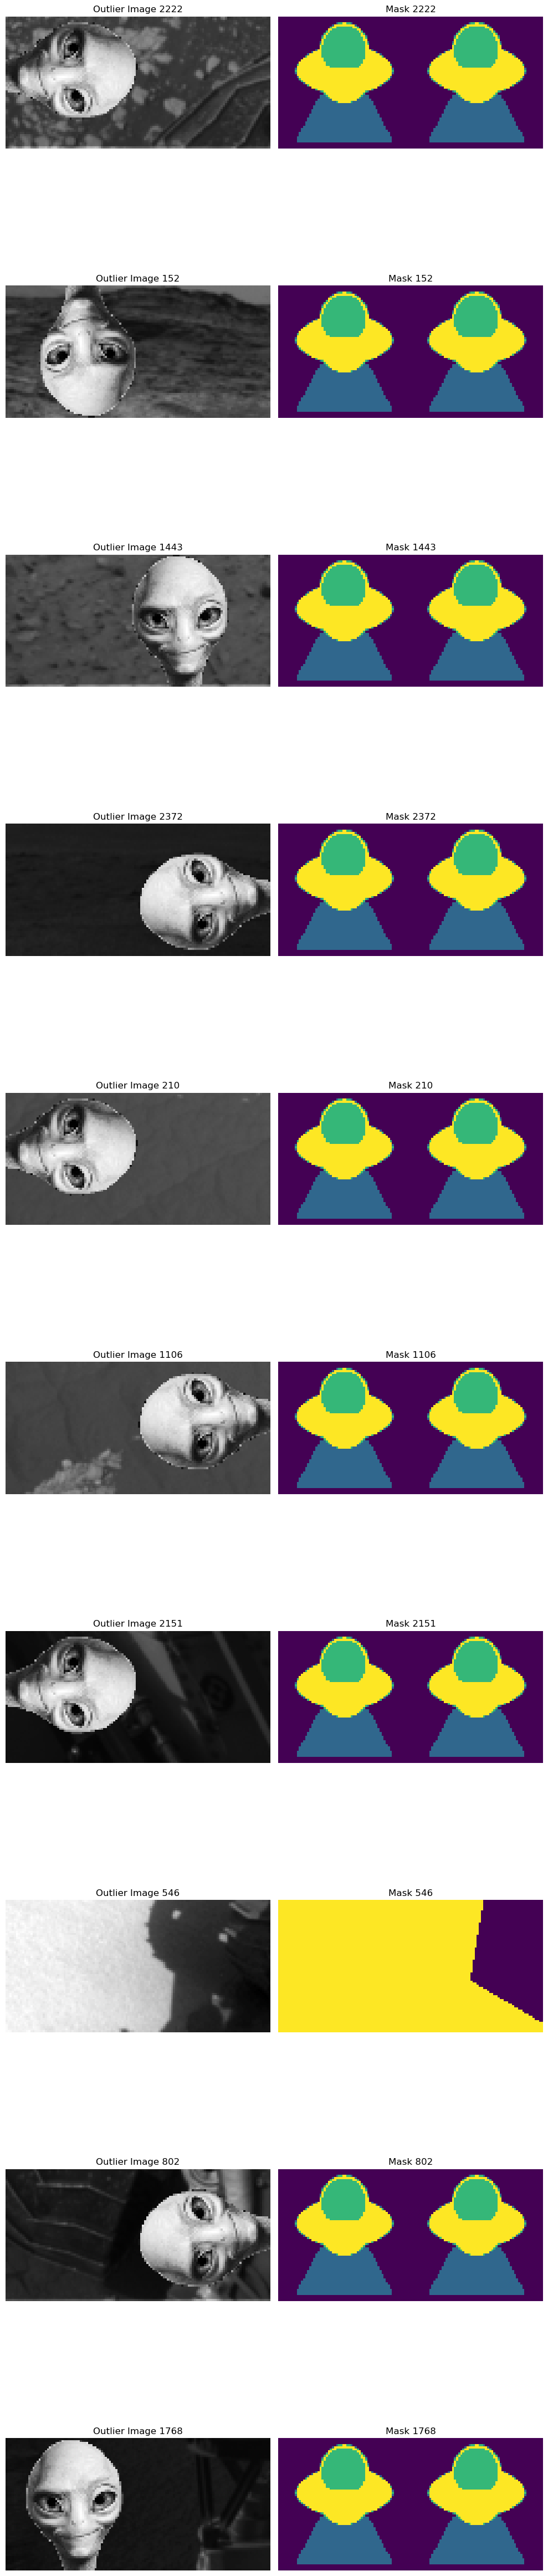

In [29]:
# Select 10 random indices from outliers_X
random_outlier_indices = np.random.choice(outliers_X, 10, replace=False)

# Plot the images and their corresponding masks in a 10x2 grid
fig, axes = plt.subplots(10, 2, figsize=(10, 50))
for i, idx in enumerate(random_outlier_indices):
    axes[i, 0].imshow(X_train[idx], cmap='gray')
    axes[i, 0].axis('off')
    axes[i, 0].set_title(f'Outlier Image {idx}')
    
    axes[i, 1].imshow(y_train[idx])
    axes[i, 1].axis('off')
    axes[i, 1].set_title(f'Mask {idx}')
plt.tight_layout()
plt.show()

In [30]:
from collections import Counter

# Round the PCA scores to 3 decimal places
pca_scores = [tuple(np.round(score, 3)) for score in y_pca]

# Count the occurrences of each tuple of PCA scores
pca_counter = Counter(pca_scores)

In [45]:
def show_most_common_score(n = 1):
    most_common_score = pca_counter.most_common(n)[-1]
    
    print(f"{n} most common PCA score: {most_common_score[0]}")
    print(f"{n} number of occurrences: {most_common_score[1]}")
    
    # Find indices of images with the most common PCA score
    common_indices = [i for i, score in enumerate(pca_scores) if score == most_common_score[0]]

    # Select 10 random indices from the common_indices
    random_common_indices = np.random.choice(common_indices, 10, replace=False)

    # Plot the images and their corresponding masks
    fig, axes = plt.subplots(10, 2, figsize=(10, 50))
    for i, idx in enumerate(random_common_indices):
        axes[i, 0].imshow(X_train[idx], cmap='gray')
        axes[i, 0].axis('off')
        axes[i, 0].set_title(f'Common Image {idx}')
        
        axes[i, 1].imshow(y_train[idx])
        axes[i, 1].axis('off')
        axes[i, 1].set_title(f'Mask {idx}')
    plt.tight_layout()
    plt.show()
    
    return common_indices

6 most common PCA score: (-31.631, -0.298)
6 number of occurrences: 40


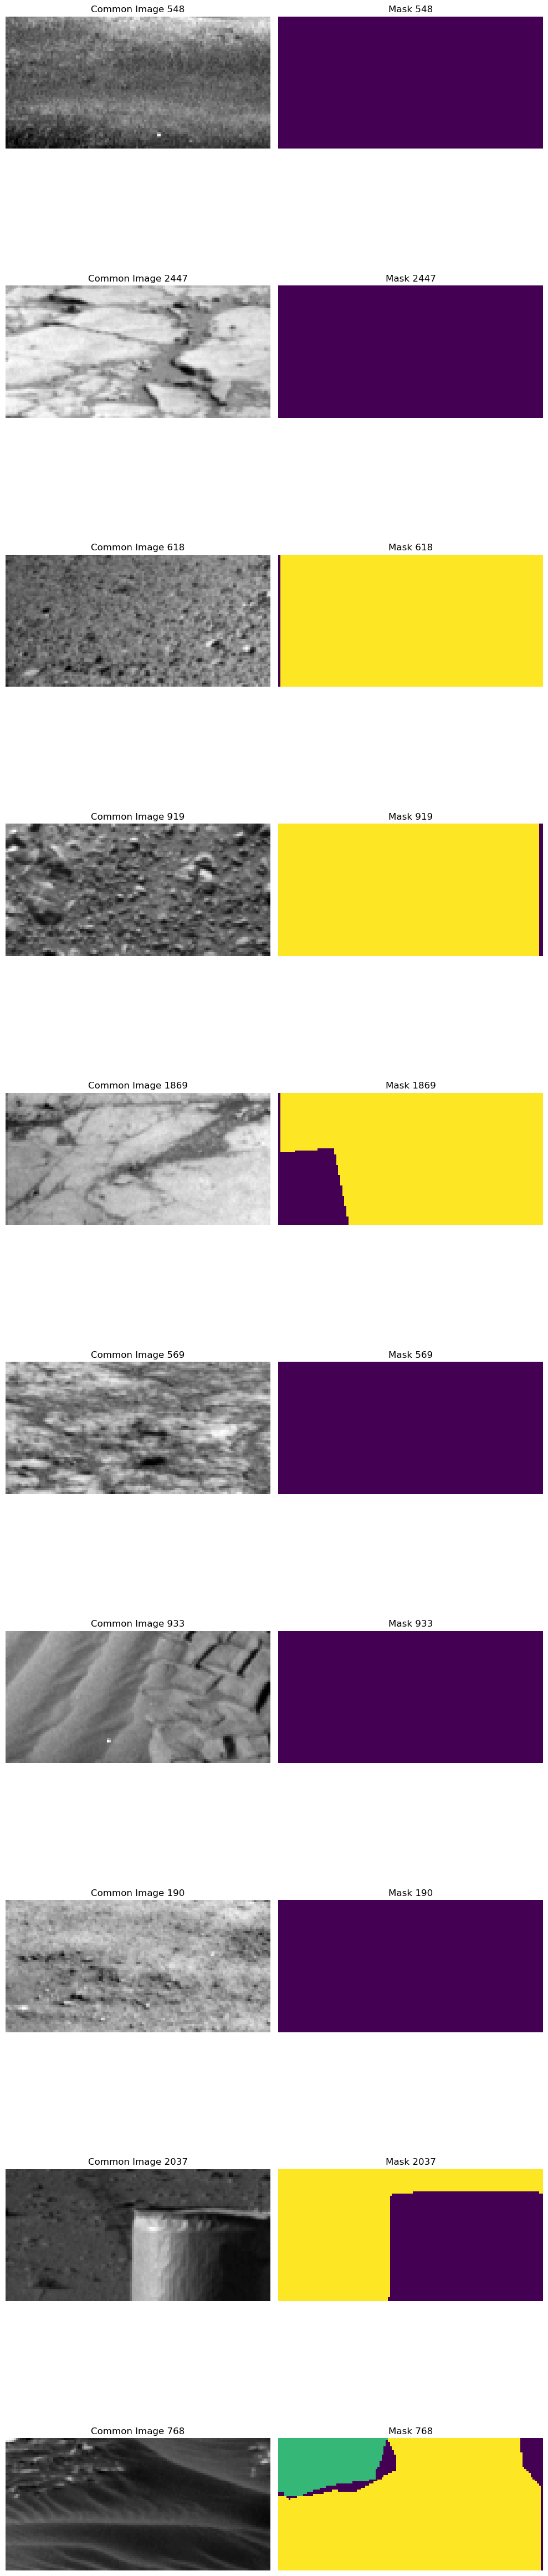

In [50]:
outliers = show_most_common_score(6)

## Deleting aliens

In [33]:
print("Number of outliers:", len(outliers))
print("Indices of outliers:", outliers)

Number of outliers: 110
Indices of outliers: [62, 79, 125, 139, 142, 147, 152, 156, 170, 210, 217, 266, 289, 299, 313, 339, 348, 365, 412, 417, 426, 450, 461, 536, 552, 669, 675, 741, 744, 747, 799, 802, 808, 820, 821, 849, 863, 890, 909, 942, 971, 1005, 1057, 1079, 1082, 1092, 1095, 1106, 1119, 1125, 1177, 1194, 1224, 1247, 1248, 1258, 1261, 1262, 1306, 1324, 1365, 1370, 1443, 1449, 1508, 1509, 1519, 1551, 1584, 1588, 1628, 1637, 1693, 1736, 1767, 1768, 1782, 1813, 1816, 1834, 1889, 1925, 1942, 1975, 1979, 2000, 2002, 2086, 2096, 2110, 2111, 2151, 2161, 2222, 2235, 2239, 2242, 2301, 2307, 2350, 2361, 2365, 2372, 2414, 2453, 2522, 2535, 2561, 2609, 2614]


In [34]:
X_clean = np.delete(X_train, outliers, axis=0)
y_clean = np.delete(y_train, outliers, axis=0)

In [35]:
np.savez_compressed('../data/mars_trainning_set_clean.npz', images=X_clean, masks=y_clean)

In [71]:
X_clean.shape, y_clean.shape

((2505, 64, 128), (2505, 64, 128))

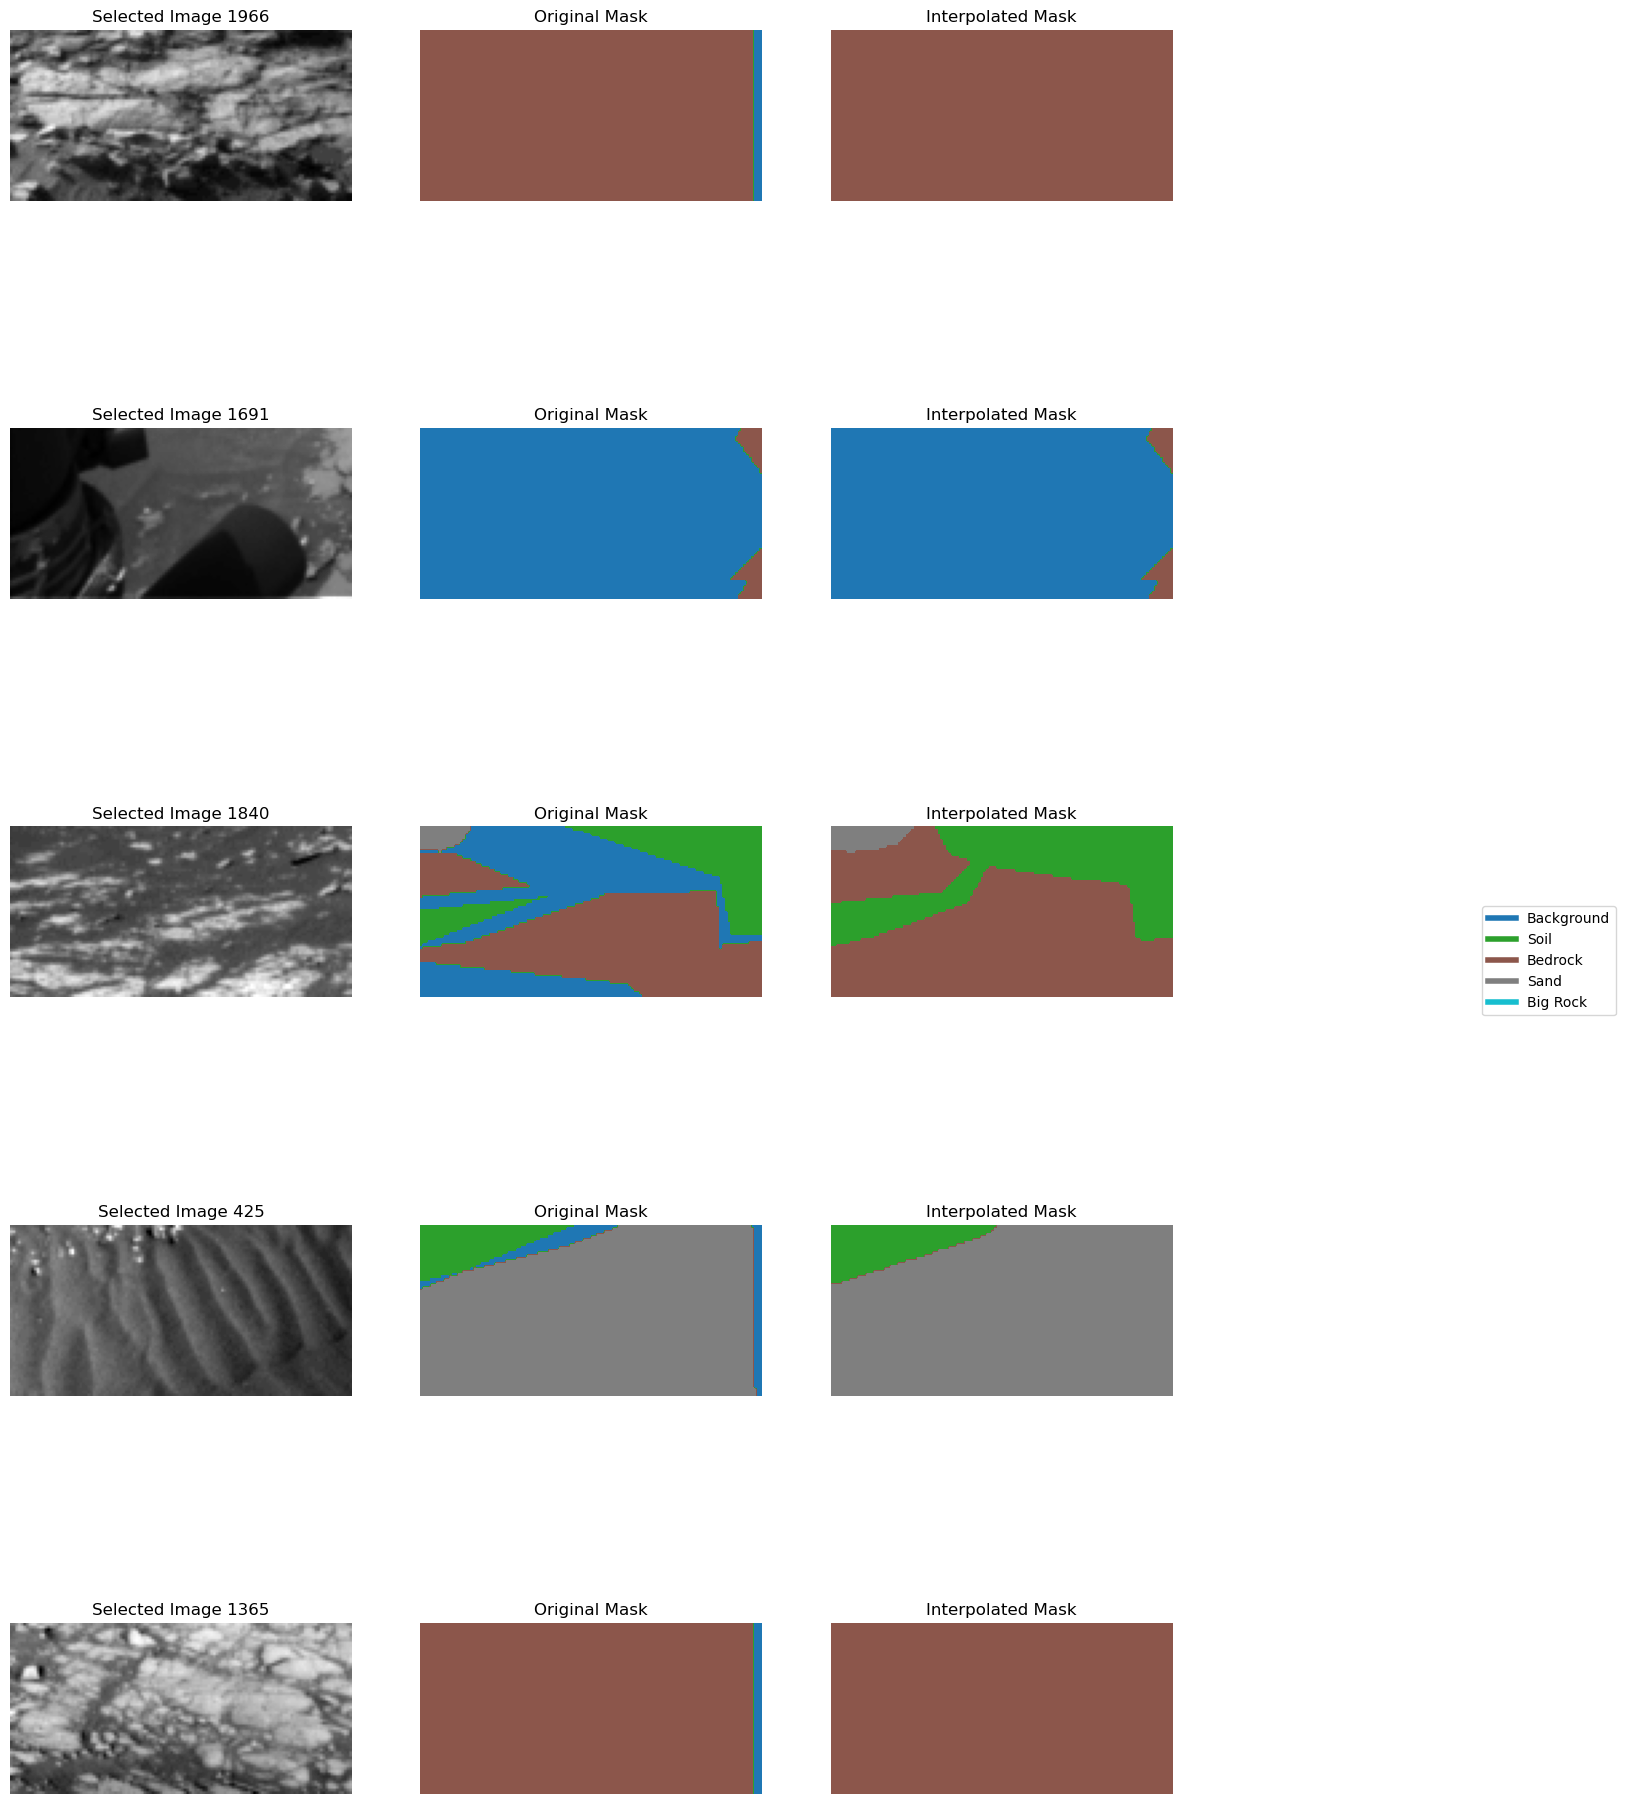

In [84]:
from scipy.ndimage import generic_filter

# indexes of all images
indexes = np.arange(len(X_train))

# Select 5 random indices from the indices_with_class_4
random_indices_with_class_4 = np.random.choice(indexes, 5, replace=False)

# Define a function to interpolate the background
def interpolate_background(values):
    center = values[len(values) // 2]
    surrounding_classes = values[values != center]
    # surrounding_classes = surrounding_classes[surrounding_classes != 4]  # Exclude class 4
    if center == 0:  # If the center is background
        if len(surrounding_classes) > 0:
            return np.bincount(surrounding_classes.astype(int)).argmax()
    return center

# Plot the original and interpolated masks for 5 random images
fig, axes = plt.subplots(5, 3, figsize=(15, 25))
for i, idx in enumerate(random_indices_with_class_4):
    selected_image = X_train[idx]
    selected_mask = y_train[idx]
    
    # Check if the mask is all background or more than 90% background
    if np.all(selected_mask == 0) or np.mean(selected_mask == 0) > 0.8:
        interpolated_mask = selected_mask
    else:
        # Apply the interpolation function to the mask
        interpolated_mask = generic_filter(selected_mask, interpolate_background, size=3, mode='constant', cval=0)
        
        # Ensure no background is left
        while np.any(interpolated_mask == 0):
            interpolated_mask = generic_filter(interpolated_mask, interpolate_background, size=3, mode='constant', cval=0)
    
    axes[i, 0].imshow(selected_image, cmap='gray')
    axes[i, 0].axis('off')
    axes[i, 0].set_title(f'Selected Image {idx}')
    
    axes[i, 1].imshow(selected_mask, cmap=cmap, vmin=0, vmax=4)
    axes[i, 1].axis('off')
    axes[i, 1].set_title('Original Mask')
    
    axes[i, 2].imshow(interpolated_mask, cmap=cmap, vmin=0, vmax=4)
    axes[i, 2].axis('off')
    axes[i, 2].set_title('Interpolated Mask')

labels = ['Background', 'Soil', 'Bedrock', 'Sand', 'Big Rock']
handles = [plt.Line2D([0], [0], color=cmap(i), lw=4) for i in range(5)]
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.2, 0.5))
plt.show()

In [85]:
from scipy.ndimage import generic_filter

# Define a function to interpolate the background
def interpolate_background(values):
    center = values[len(values) // 2]
    surrounding_classes = values[values != center]
    if center == 0:  # If the center is background
        if len(surrounding_classes) > 0:
            return np.bincount(surrounding_classes.astype(int)).argmax()
    return center

# Apply interpolation to the entire cleaned dataset
interpolated_masks = []
for mask in y_clean:
    if np.all(mask == 0) or np.mean(mask == 0) > 0.8:
        interpolated_masks.append(mask)
    else:
        interpolated_mask = generic_filter(mask, interpolate_background, size=3, mode='constant', cval=0)
        while np.any(interpolated_mask == 0):
            interpolated_mask = generic_filter(interpolated_mask, interpolate_background, size=3, mode='constant', cval=0)
        interpolated_masks.append(interpolated_mask)

# Convert the list to a numpy array
interpolated_masks = np.array(interpolated_masks)

# Save the interpolated masks
np.savez_compressed('../data/mars_training_set_interpolated.npz', images=X_clean, masks=interpolated_masks)

KeyboardInterrupt: 

# Check cleaned dataset

In [37]:
dataset_cleaned = np.load('../data/mars_trainning_set_clean.npz', allow_pickle=True)
X_train = dataset_cleaned['images']
y_train = dataset_cleaned['masks']

### T-SNE

In [38]:
from sklearn.manifold import TSNE
from scipy.spatial import distance
from matplotlib.gridspec import GridSpec
import hashlib
from tqdm import tqdm

def hash_image(image):
    return hashlib.md5(image.tobytes()).hexdigest()

def tsne_outlier_detection(images, masks, title):
    # Flatten the images and masks
    flat_data = images.reshape(images.shape[0], -1)
    
    # Generate t-SNE embeddings
    print("Generating t-SNE embeddings...")
    scores_tsne = TSNE(n_components=2, perplexity=60).fit_transform(flat_data)
    
    # Plot for t-SNE visualization
    fig = plt.figure(figsize=(15, 12))  # Adjust figure size for better view
    gs = GridSpec(4, 4, figure=fig) 
    
    # Colors for highlighted points
    highlighted_colors = plt.cm.tab20(np.linspace(0, 1, 8))  # 8 unique colors for highlighted points
    
    # Plot for t-SNE visualization (taking 2 columns)
    ax_tsne = fig.add_subplot(gs[:, :2])  # Use first two columns for the t-SNE plot
    ax_tsne.scatter(scores_tsne[:, 0], scores_tsne[:, 1], s=20, c='gray', label="All points")
    ax_tsne.set_title(f't-SNE Visualization with Outliers')
    
    # Calculate Mahalanobis distances
    print("Calculating Mahalanobis distances...")
    mean = np.mean(scores_tsne, axis=0)
    cov_inv = np.linalg.inv(np.cov(scores_tsne.T))
    mahalanobis_distances = [distance.mahalanobis(x, mean, cov_inv) for x in tqdm(scores_tsne)]
    
    # Unique images for high outlier distances, filtered by hash
    print("Identifying unique images with high outlier distances...")
    highest_distance_indices = np.argsort(mahalanobis_distances)[::-1]
    unique_images = []
    unique_indices = []
    
    for idx in tqdm(highest_distance_indices):
        img_hash = hash_image(flat_data[idx])
        if img_hash not in unique_images:
            unique_images.append(img_hash)
            unique_indices.append(idx)
        if len(unique_indices) >= 8:
            break
    
    # Highlight points for unique images with distinct colors
    highlighted_indices_in_tsne = [idx for idx in unique_indices]
    for i, idx in enumerate(highlighted_indices_in_tsne):
        ax_tsne.scatter(scores_tsne[idx, 0], scores_tsne[idx, 1], 
                        s=80, c=[highlighted_colors[i]], edgecolors='black', marker='o', 
                        label=f"Highlighted Outlier {i+1}")
    
    # Plot images with high outlier distances on the right side
    print("Plotting images with high outlier distances...")
    for i, idx in enumerate(unique_indices):
        row = i // 2   # 4 rows of images
        col = (i % 2) * 2 + 2  # Rightmost two columns for images (offset by 2 for t-SNE plot)
        
        if col + 1 >= gs.ncols:
            continue  # Skip if the column index is out of bounds
        
        ax_img = fig.add_subplot(gs[row, col])  # Plot in 4x2 grid on the right
        
        image_reshaped = flat_data[idx].reshape(images.shape[1], images.shape[2])
        
        ax_img.imshow(np.clip(image_reshaped, 0, 255))
        ax_img.axis('off')
        ax_img.set_title(f"Index: {idx}\nDistance: {mahalanobis_distances[highest_distance_indices[i]]:.2f}")
        
        ax_mask = fig.add_subplot(gs[row, col + 1])  # Plot in the next column for masks
        mask_reshaped = masks[idx]
        
        ax_mask.imshow(np.clip(mask_reshaped, 0, 255))
        ax_mask.axis('off')
        ax_mask.set_title(f"Mask Index: {idx}")

    # Add legend and adjust layout
    ax_tsne.legend()
    plt.tight_layout()
    plt.show()

Generating t-SNE embeddings...
Calculating Mahalanobis distances...


100%|██████████| 2505/2505 [00:00<00:00, 123145.00it/s]


Identifying unique images with high outlier distances...


  0%|          | 7/2505 [00:00<00:00, 6995.50it/s]

Plotting images with high outlier distances...


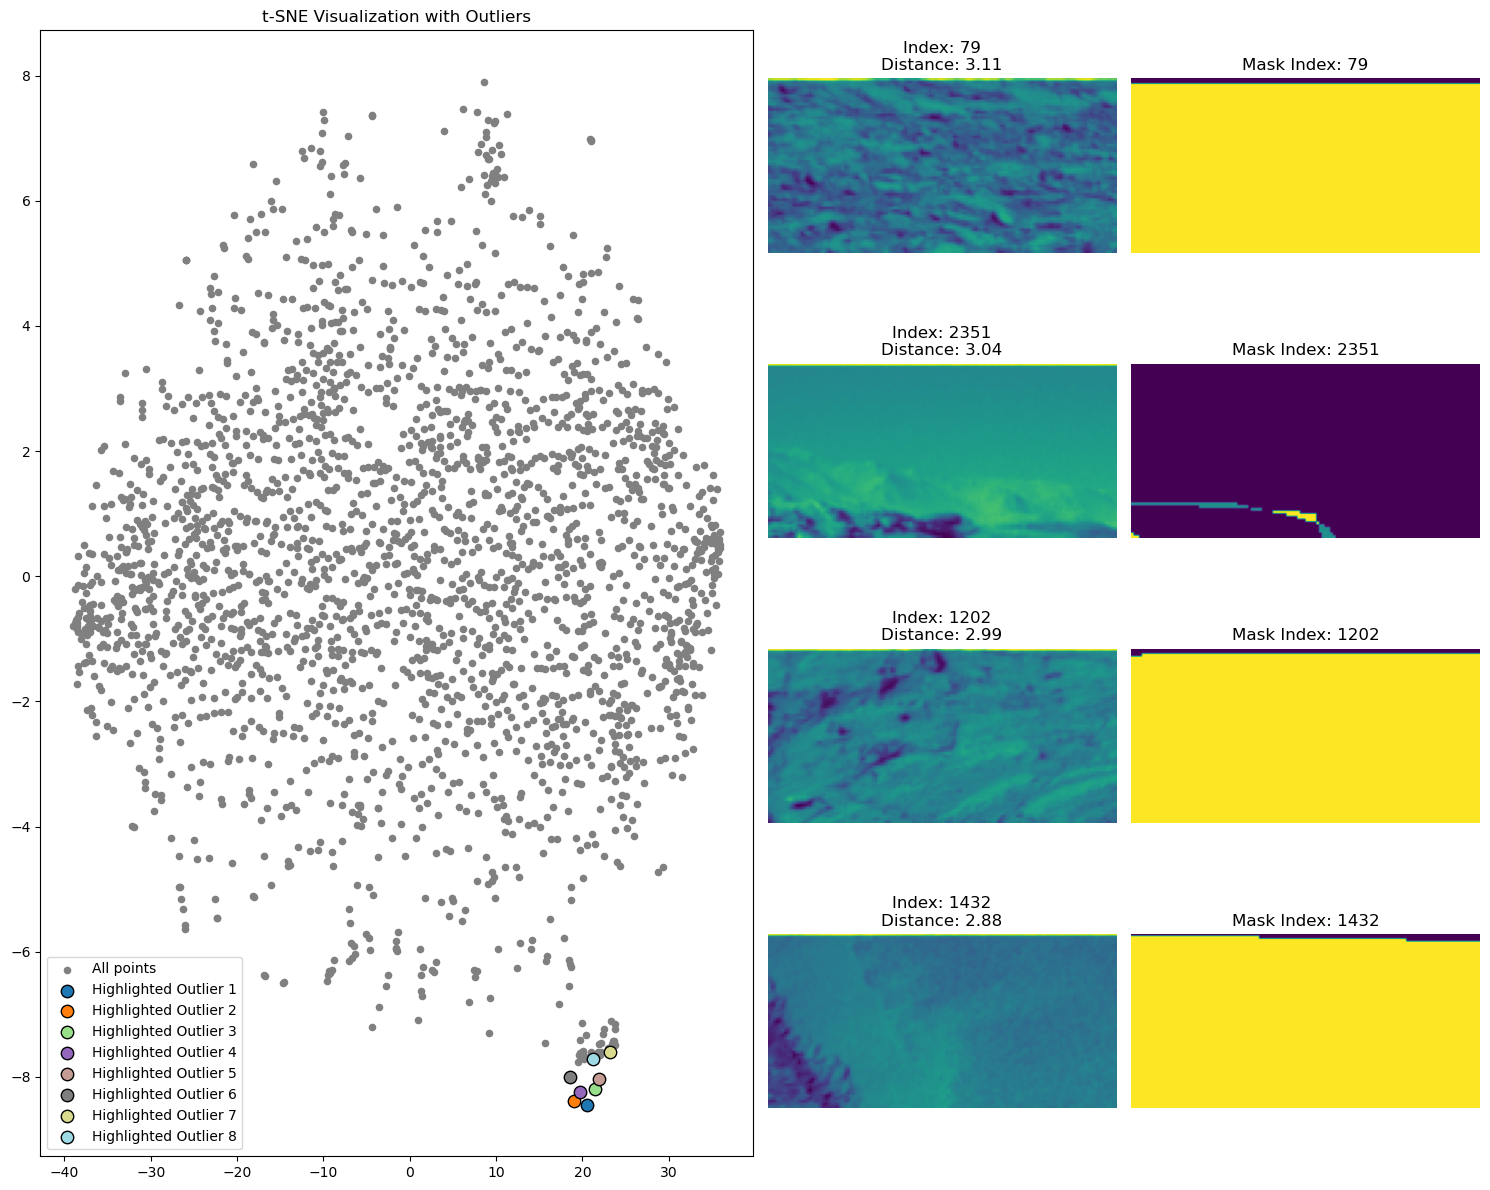

In [39]:
tsne_outlier_detection(X_train, y_train, title = 'Tsne on Images')

Generating t-SNE embeddings...
Calculating Mahalanobis distances...


100%|██████████| 2505/2505 [00:00<00:00, 124544.89it/s]


Identifying unique images with high outlier distances...


  0%|          | 7/2505 [00:00<00:00, 3489.44it/s]

Plotting images with high outlier distances...


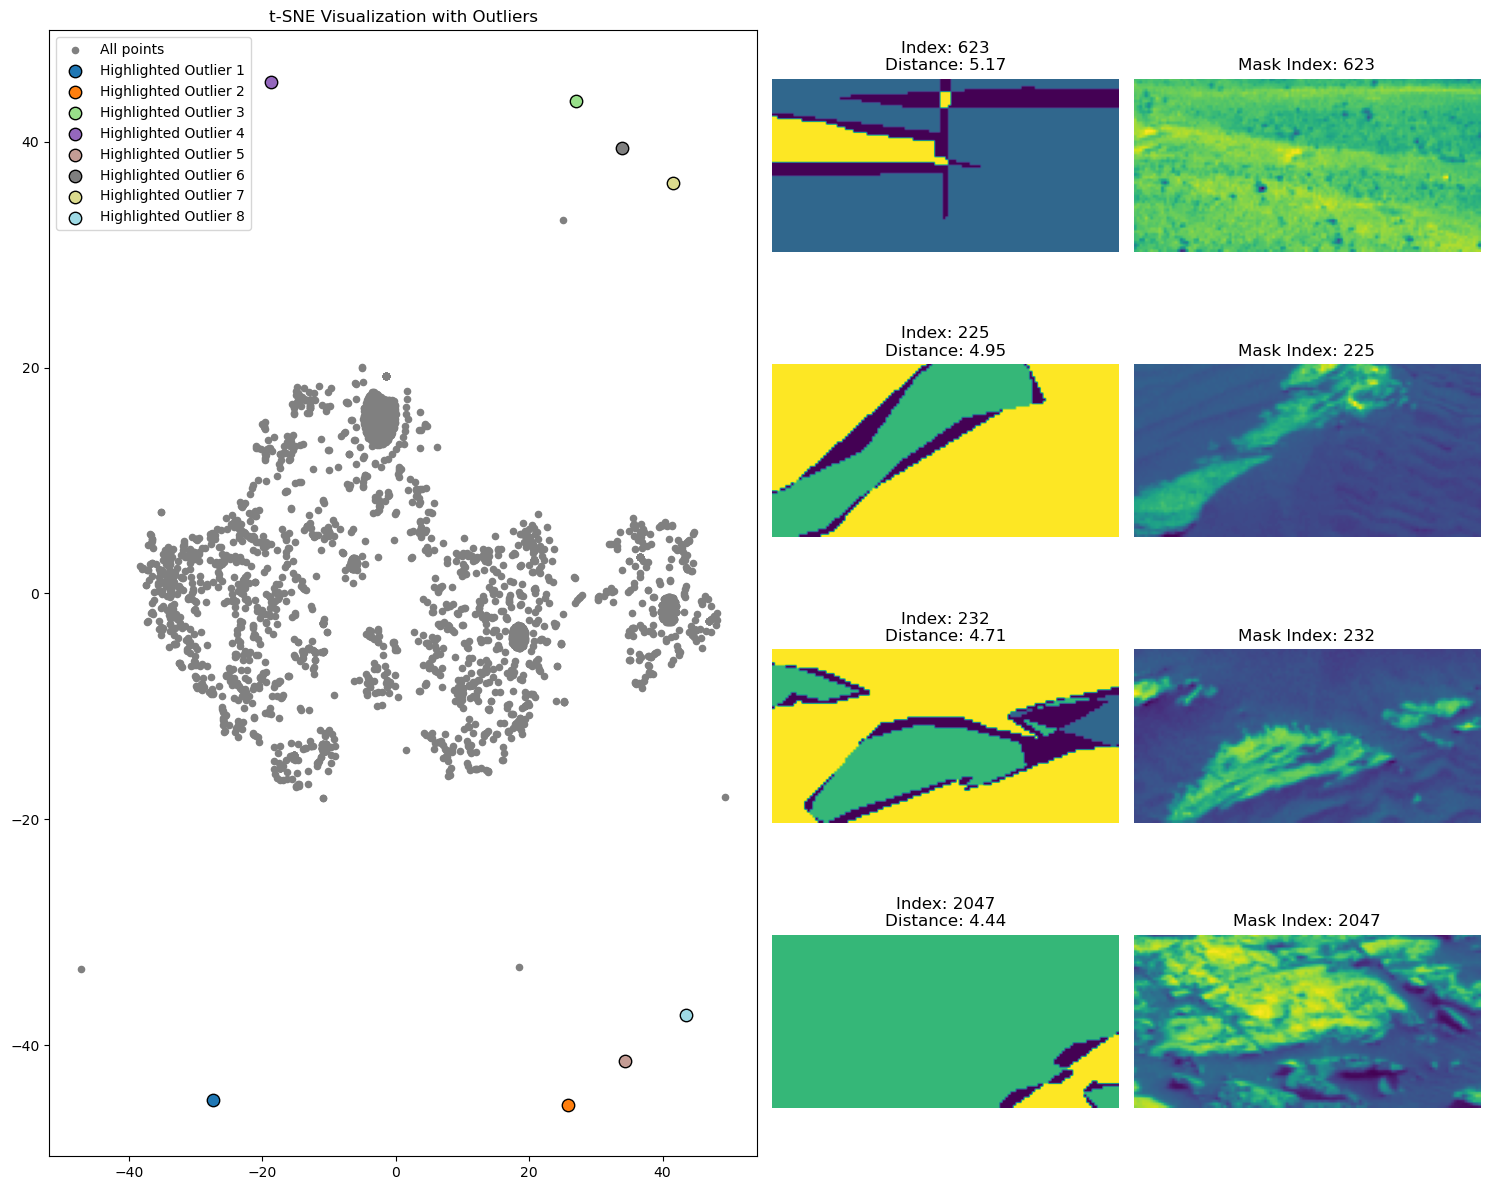

In [40]:
tsne_outlier_detection(y_train, X_train, title= 'Tsne on Masks')

it seems to be okay now, mars will stay dead, by now...